In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = [8, 8]
sns.set_theme(style="whitegrid")
sns.color_palette("rocket", as_cmap=True)
sns.set_palette("pastel")
#hide all warnings
import warnings
warnings.filterwarnings('ignore')

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

In [37]:
data_dir = "../data/"
plots_dir = "../plots/"

In [116]:
reviews = pd.read_csv(data_dir+"reviews.csv")
reviews.drop("Unnamed: 0", inplace=True, axis=1)

In [117]:
reviews["game_name"]=reviews.game_name.str.split("       ",expand=True,)[0]
reviews.head()

,game_id,game_name,score,author,date,summary
0,0,Disco Elysium: The Final Cut,100,GameGrin,"Oct 15, 2021",Traversing the mind of your character is as mu...
1,0,Disco Elysium: The Final Cut,100,Shindig,"Jun 18, 2021",Disco Elysium – The Final Cut is something rar...
2,0,Disco Elysium: The Final Cut,100,KeenGamer,"Apr 26, 2021","Enhanced with fantastic and fresh content, Dis..."
3,0,Disco Elysium: The Final Cut,100,GameSpot,"Apr 15, 2021",A fully voiced cast and new content of compara...
4,0,Disco Elysium: The Final Cut,100,Wccftech,"Apr 15, 2021",Disco Elysium: The Final Cut doesn't shy away ...


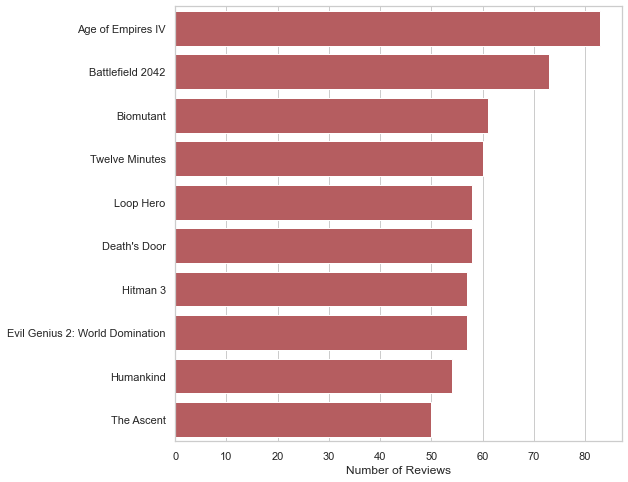

In [118]:
#number of reviews for games
data = pd.DataFrame(reviews.game_name.value_counts()[:10])
data.reset_index(inplace=True)
sns.barplot(x="game_name", y="index", data=data, color="r")
plt.xlabel("Number of Reviews")
plt.ylabel("");

In [119]:
stop_words=set(stopwords.words("english"))

#tokenised list of reviews that do not contain stop words
def tokenized_summary(x):
    filtered_sent=[]
    for w in word_tokenize(x):
        if w not in stop_words:
            filtered_sent.append(w)
    return filtered_sent

reviews["tokenised"] = reviews['summary'].apply(lambda x: tokenized_summary(x))

In [180]:
#Lemmatization 
import string
lem = WordNetLemmatizer()
def lemmatized_list(x):
    lemmatized=[]
    for w in x:
        lemmatized.append(lem.lemmatize(w))
    final_string =  " ".join(lemmatized)
    return final_string.translate(str.maketrans('', '', string.punctuation))


reviews["lemmatized"] = reviews['tokenised'].apply(lambda x: lemmatized_list(x))


In [181]:
reviews.head()

,game_id,game_name,score,author,date,summary,tokenised,lemmatized,sentiment_label,sentiment_value
0,0,Disco Elysium: The Final Cut,100,GameGrin,"Oct 15, 2021",Traversing the mind of your character is as mu...,"[Traversing, mind, character, much, plot, case...",Traversing mind character much plot case ’ try...,negative,-0.2960
1,0,Disco Elysium: The Final Cut,100,Shindig,"Jun 18, 2021",Disco Elysium – The Final Cut is something rar...,"[Disco, Elysium, –, The, Final, Cut, something...",Disco Elysium – The Final Cut something rare ...,positive,0.9161
2,0,Disco Elysium: The Final Cut,100,KeenGamer,"Apr 26, 2021","Enhanced with fantastic and fresh content, Dis...","[Enhanced, fantastic, fresh, content, ,, Disco...",Enhanced fantastic fresh content Disco Elysiu...,positive,0.9423
3,0,Disco Elysium: The Final Cut,100,GameSpot,"Apr 15, 2021",A fully voiced cast and new content of compara...,"[A, fully, voiced, cast, new, content, compara...",A fully voiced cast new content comparable qua...,positive,0.8705
4,0,Disco Elysium: The Final Cut,100,Wccftech,"Apr 15, 2021",Disco Elysium: The Final Cut doesn't shy away ...,"[Disco, Elysium, :, The, Final, Cut, n't, shy,...",Disco Elysium The Final Cut nt shy away probl...,positive,0.5571


In [219]:
#!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sid_obj = SentimentIntensityAnalyzer()

def vader_sentiment(x):
    sentiment_dict = sid_obj.polarity_scores(x)
    if sentiment_dict['compound'] > 0.05:
        return pd.Series(['positive', sentiment_dict['compound']])
    elif sentiment_dict['compound'] <= -0.05:
        return pd.Series(['negative', sentiment_dict['compound']])
    else:
        return pd.Series(['neutral',sentiment_dict['compound']])

reviews[["sentiment_label", 'sentiment_value']] = reviews['summary'].apply(lambda x: vader_sentiment(x))


In [220]:
reviews.head()

,game_id,game_name,score,author,date,summary,tokenised,lemmatized,sentiment_label,sentiment_value
0,0,Disco Elysium: The Final Cut,100,GameGrin,"Oct 15, 2021",Traversing the mind of your character is as mu...,"[Traversing, mind, character, much, plot, case...",Traversing mind character much plot case ’ try...,negative,-0.2960
1,0,Disco Elysium: The Final Cut,100,Shindig,"Jun 18, 2021",Disco Elysium – The Final Cut is something rar...,"[Disco, Elysium, –, The, Final, Cut, something...",Disco Elysium – The Final Cut something rare ...,positive,0.9142
2,0,Disco Elysium: The Final Cut,100,KeenGamer,"Apr 26, 2021","Enhanced with fantastic and fresh content, Dis...","[Enhanced, fantastic, fresh, content, ,, Disco...",Enhanced fantastic fresh content Disco Elysiu...,positive,0.9423
3,0,Disco Elysium: The Final Cut,100,GameSpot,"Apr 15, 2021",A fully voiced cast and new content of compara...,"[A, fully, voiced, cast, new, content, compara...",A fully voiced cast new content comparable qua...,positive,0.8705
4,0,Disco Elysium: The Final Cut,100,Wccftech,"Apr 15, 2021",Disco Elysium: The Final Cut doesn't shy away ...,"[Disco, Elysium, :, The, Final, Cut, n't, shy,...",Disco Elysium The Final Cut nt shy away probl...,negative,-0.4731


In [221]:
sentiments_group = reviews.groupby(by=['game_name'])['sentiment_value'].agg('mean').reset_index()
sentiments_group.columns = ['game_name', 'average_sentiment']


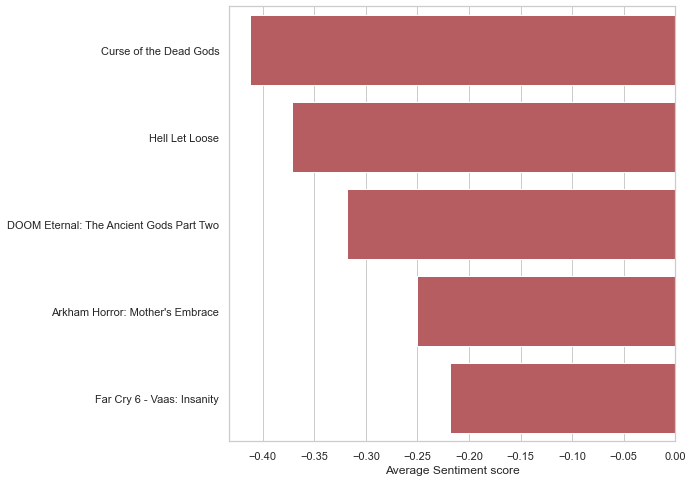

In [222]:
#Top 5 negative sentiment Games 
negative = sentiments_group.sort_values(by='average_sentiment')[:5]
sns.barplot(y="game_name", x="average_sentiment", data=negative, color="r")
plt.xlabel("Average Sentiment score")
plt.ylabel("");

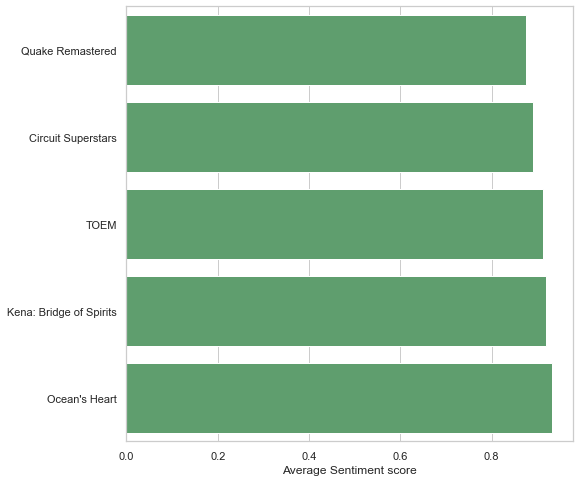

In [223]:
#Top 5 Positive sentiment Games 
negative = sentiments_group.sort_values(by='average_sentiment')[-5:]
sns.barplot(y="game_name", x="average_sentiment", data=negative, color="g")
plt.xlabel("Average Sentiment score")
plt.ylabel("");

Ocean's Heart reviews has the highest average positive sentiment whereas Curse of the Dear Gods has the worst average sentiment score

## TF-IDF

In [213]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(tokenizer=word_tokenize, min_df=10, max_features=500) 
vectors = vectorizer.fit_transform(reviews['lemmatized'])

feature_names = vectorizer.get_feature_names()
dense = vectors.todense()
denselist = dense.tolist()
tfidf = pd.DataFrame(denselist, columns=feature_names)

#tfidf originally made ~2500 words in the doc but in my opinion with 5000 reviews, 
#we can narrrow down to top 500 words 

In [214]:
column_names = tfidf.columns
column_names

Index(['2', '2021', '2042', '3', '4', '5', 'a', 'ability', 'able',
       'absolutely',
       ...
       'would', 'writing', 'year', 'yet', 'you', '–', '—', '’', '“', '”'],
      dtype='object', length=500)

We need to drop the numbers or years in the review as they are not important for our analysis

In [215]:
#removing columns that have integers/ years
columns_excluded = []
for w in column_names: 
    try:
        int(w)
        columns_excluded.append(w)
    except:
        None
        
tfidf.drop(columns=columns_excluded, inplace=True)

In [218]:
final_df = reviews.join(tfidf)
final_df.head()

,game_id,game_name,score,author,date,summary,tokenised,lemmatized,sentiment_label,sentiment_value,...,would,writing,year,yet,you,–,—,’,“,”
0,0,Disco Elysium: The Final Cut,100,GameGrin,"Oct 15, 2021",Traversing the mind of your character is as mu...,"[Traversing, mind, character, much, plot, case...",Traversing mind character much plot case ’ try...,negative,-0.2960,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.435831,0.0,0.0
1,0,Disco Elysium: The Final Cut,100,Shindig,"Jun 18, 2021",Disco Elysium – The Final Cut is something rar...,"[Disco, Elysium, –, The, Final, Cut, something...",Disco Elysium – The Final Cut something rare ...,positive,0.9161,...,0.0,0.0,0.000000,0.000000,0.0,0.261586,0.0,0.353187,0.0,0.0
2,0,Disco Elysium: The Final Cut,100,KeenGamer,"Apr 26, 2021","Enhanced with fantastic and fresh content, Dis...","[Enhanced, fantastic, fresh, content, ,, Disco...",Enhanced fantastic fresh content Disco Elysiu...,positive,0.9423,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.146406,0.0,0.0
3,0,Disco Elysium: The Final Cut,100,GameSpot,"Apr 15, 2021",A fully voiced cast and new content of compara...,"[A, fully, voiced, cast, new, content, compara...",A fully voiced cast new content comparable qua...,positive,0.8705,...,0.0,0.0,0.159141,0.177394,0.0,0.000000,0.0,0.000000,0.0,0.0
4,0,Disco Elysium: The Final Cut,100,Wccftech,"Apr 15, 2021",Disco Elysium: The Final Cut doesn't shy away ...,"[Disco, Elysium, :, The, Final, Cut, n't, shy,...",Disco Elysium The Final Cut nt shy away probl...,negative,-0.4767,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0


In [224]:
final_df.to_csv(data_dir+"tfidf.csv")

VADER doesn't seem to be performing well for the reviews dataset. For example for the review below, it gives it a negative sentiment but it's not exactly a negative review and the score given by reviewer is 100.  With GPT3, we get a positive sentiment which makes more sense (https://beta.openai.com/playground/p/default-tweet-classifier?model=text-davinci-001). 

In [226]:
final_df.iloc[4,5] 

"Disco Elysium: The Final Cut doesn't shy away from its problems, but each one just cements how interesting those flaws are. Minor technical issues can be fixed, but what the game does, how it does it, and how the player responds is something that no other medium, no other game has achieved."

In [229]:
final_df.iloc[4,8] 

'negative'